American sign language alphabet detection from images



# FASTAI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.data.all import *
import torch;

In [ ]:
path = "./Train_Alphabet/"
path2 = "./Test_Alphabet/"
# train_images = list()
# train_labels = list()
# test_images = list()
# test_labels = list()
# limit = 20
# count2 = 0
# for subdir in os.scandir(path):
#     if subdir.is_dir():
#       count = 0
#       for imgfile in os.scandir(subdir.path):
#         if imgfile.is_file():
#           os.remove(imgfile.path)
#           #train_images.append(imread(imgfile.path))
#           train_labels.append(subdir.path.split('/')[-1])
#           count += 1
#           count2 += 1
#           # if count > limit:
#           #   break
#       os.rmdir(subdir.path)
# print(count2)
# count2 = 0
# for subdir in os.scandir(path2):
#     if subdir.is_dir():
#       for imgfile in os.scandir(subdir.path):
#         if imgfile.is_file():
#           os.remove(imgfile.path)
#           #test_images.append(imread(imgfile.path))
#           #test_labels.appesubdir.path.split('/')[-1])
#           count2 += 1
#       os.rmdir(subdir.path)
# print(count2)


In [ ]:
#torch.cuda.empty_cache()
np.random.seed(42)
#don't know about size variable
tfms = aug_transforms(mult=2, do_flip=False, flip_vert=False,
                    max_rotate=20, min_zoom=0.6, max_zoom=1.4, max_lighting=0.2,
                    max_warp=0, p_affine=0.3,
                    p_lighting=0.75, xtra_tfms=None,
                    size=None, mode='bilinear',
                    pad_mode='zeros', align_corners=True, batch=False,
                    min_scale=1.0)
data = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=RandomSplitter(valid_pct=0.2, seed=111),
                  get_y=parent_label,
                  batch_tfms=tfms
                  )
dls = data.dataloaders(path, bs = 15)
print(dls.bs)

15


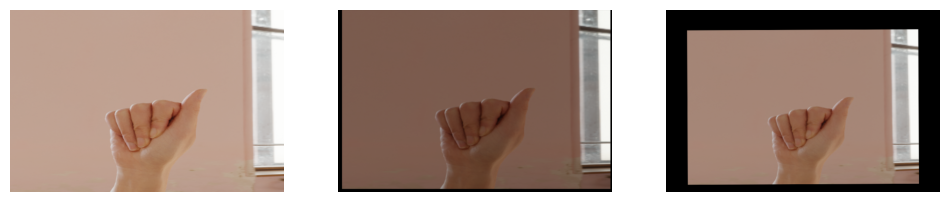

In [ ]:
img = PILImage(PILImage.create("./Train_Alphabet/A/0042513a-63c0-499f-a7f7-e6ee1266cb98.rgb_0000.png").resize((600,400)))
timg = TensorImage(array(img)).permute(2,0,1).float()/255.
#tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=0.5)
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(1,3, figsize=(12,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

In [ ]:

dls.train_ds

(#19440) [(PILImage mode=RGB size=513x512, TensorCategory(20)),(PILImage mode=RGB size=513x512, TensorCategory(6)),(PILImage mode=RGB size=513x512, TensorCategory(7)),(PILImage mode=RGB size=513x512, TensorCategory(14)),(PILImage mode=RGB size=513x512, TensorCategory(23)),(PILImage mode=RGB size=513x512, TensorCategory(14)),(PILImage mode=RGB size=513x512, TensorCategory(11)),(PILImage mode=RGB size=513x512, TensorCategory(7)),(PILImage mode=RGB size=513x512, TensorCategory(22)),(PILImage mode=RGB size=513x512, TensorCategory(15))...]

In [ ]:
#print(data.test_ds)
# print(torch.cuda.is_available())
# torch.zeros(1).cuda()

True


tensor([0.], device='cuda:0')

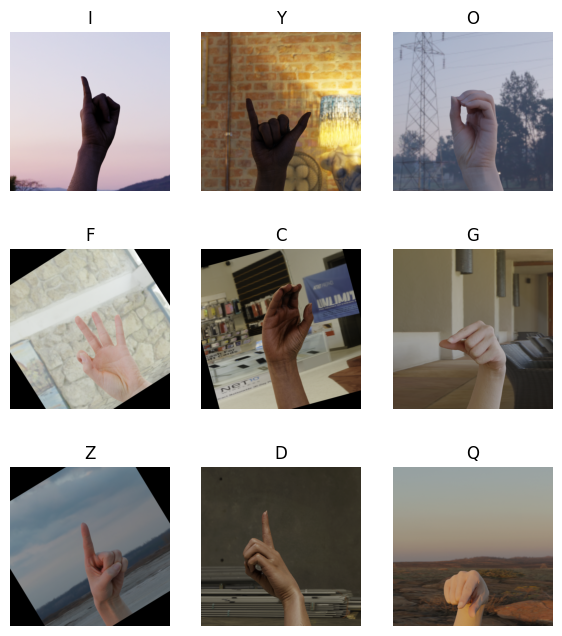

In [ ]:
dls.show_batch(max_n=9, figsize=(7,8))

In [ ]:
data.summary("./Train_Alphabet/")

Setting-up type transforms pipelines
Found 24300 items
2 datasets of sizes 19440,4860
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      Train_Alphabet\T\82b4520f-d29e-4853-9d4a-7cbe4bc1bf9e.rgb_0000.png
    applying PILBase.create gives
      PILImage mode=RGB size=513x512
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      Train_Alphabet\T\82b4520f-d29e-4853-9d4a-7cbe4bc1bf9e.rgb_0000.png
    applying parent_label gives
      T
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(20)

Final sample: (PILImage mode=RGB size=513x512, TensorCategory(20))


Found 24300 items
2 datasets of sizes 19440,4860
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

# TRAIN

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0063095735386013985)

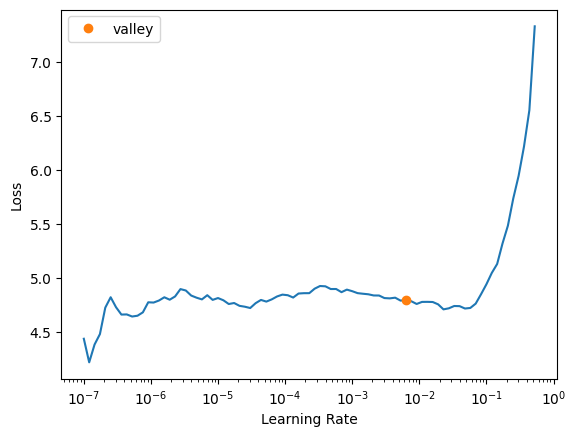

In [ ]:
learn = vision_learner(dls, models.resnet34, metrics=accuracy, pretrained=True)
learn.lr_find()

# learn.fit_one_cycle(2)


In [ ]:
#learn.fine_tune()
xb,yb = learn.dls.one_batch()
init_loss = learn.loss_func(learn.model(xb), yb)
learn.fit_one_cycle(2)
xb,yb = learn.dls.one_batch()
final_loss = learn.loss_func(learn.model(xb), yb)
assert final_loss < init_loss

epoch,train_loss,valid_loss,accuracy,time
0,0.184464,0.014877,0.996502,11:04
1,0.097635,0.008537,0.999588,25:49


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
import pickle
import os

learn.export("fa_export_3_pretrained.pkl")


In [ ]:
# img = open_image("/content/Test_Alphabet/A/081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png")



In [ ]:
# pred_class,pred_idx,outputs = learn.predict(img)
# pred_class.obj

'A'

NameError: name 'interp' is not defined

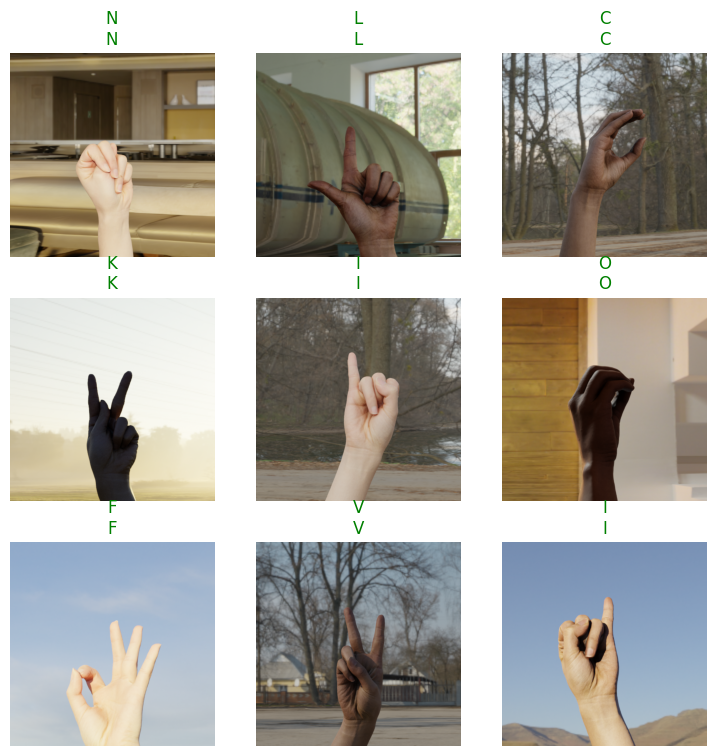

In [ ]:
learn.show_results()
interp.plot_top_losses(9, figsize=(15,10))

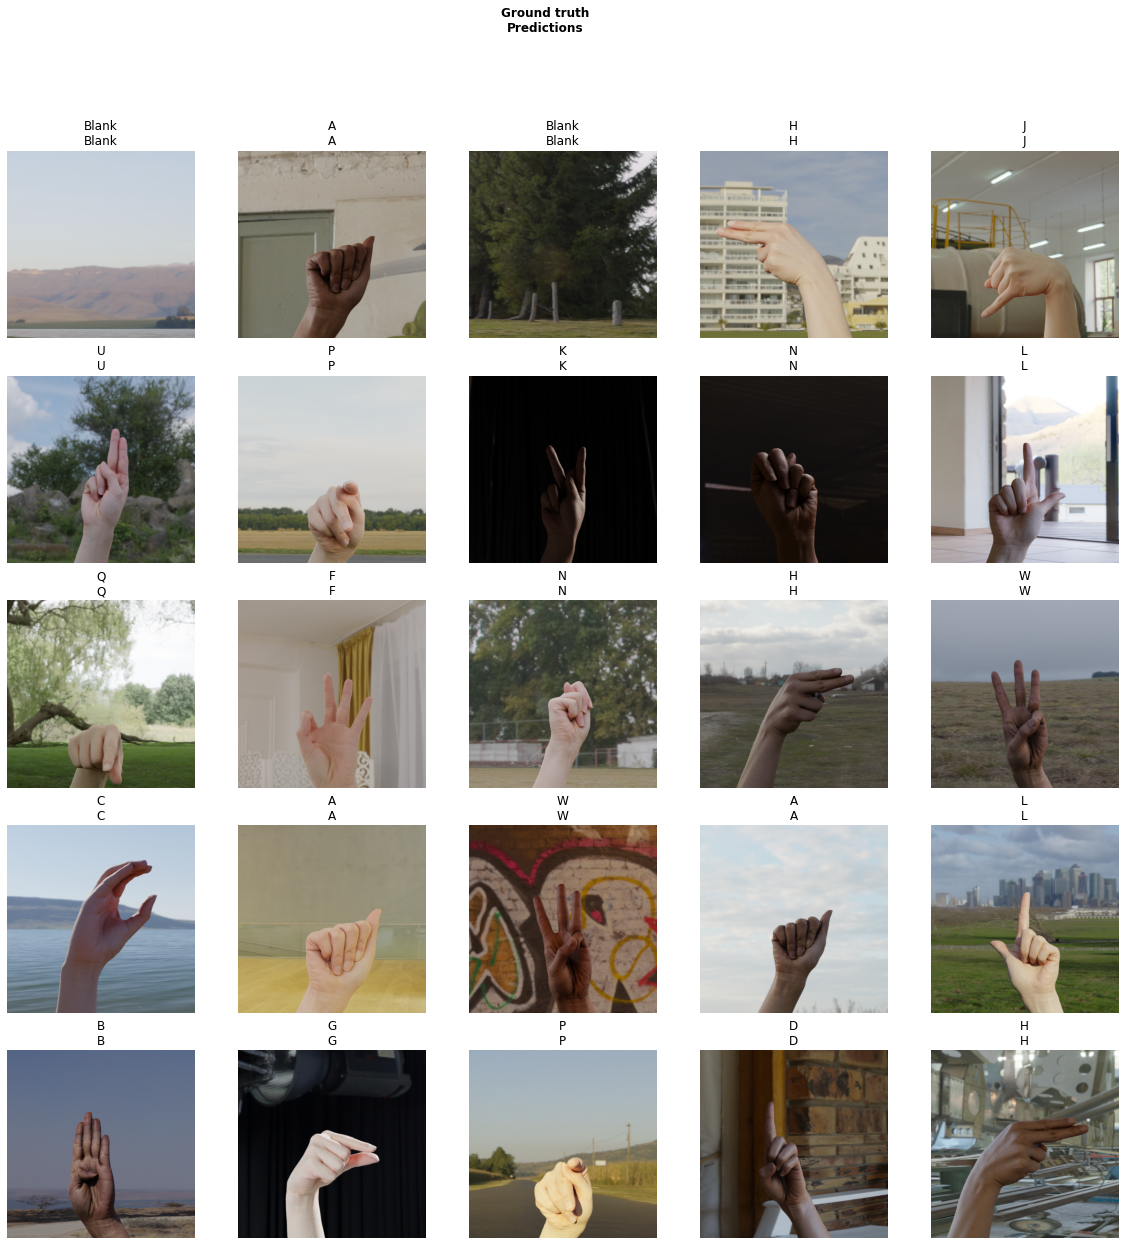

In [ ]:
learn.show_results()

In [ ]:
test_files = get_image_files(path2)
test_dl = dls.test_dl(test_files, with_label=True, get_y=parent_label)
pred_probas, c, pred_classes = learn.get_preds(dl=test_dl, with_decoded=True)
print(pred_probas, c, pred_classes)

TensorBase([[1.0000e+00, 1.7535e-09, 1.1360e-09,  ..., 3.7636e-11,
             5.9470e-08, 1.6578e-12],
            [9.9999e-01, 5.5011e-09, 2.7618e-08,  ..., 1.6181e-10,
             9.3613e-07, 5.2070e-11],
            [1.0000e+00, 8.4062e-08, 1.2391e-07,  ..., 4.9090e-11,
             2.6182e-07, 3.6392e-11],
            ...,
            [4.2528e-13, 1.9237e-13, 3.5941e-11,  ..., 7.1003e-10,
             5.7268e-09, 1.0000e+00],
            [2.6472e-12, 1.9514e-10, 4.1325e-10,  ..., 2.0831e-06,
             4.4793e-09, 1.0000e+00],
            [4.2642e-12, 1.8038e-10, 7.8554e-09,  ..., 6.8423e-08,
             2.8680e-08, 9.9998e-01]]) None TensorBase([ 0,  0,  0,  ..., 26, 26, 26])


In [ ]:
#manual accuracy calc
from PIL import Image
from fastai.vision import *
results = list()
for subdir in os.scandir(path2):
    if subdir.is_dir():
      for imgfile in os.scandir(subdir.path):
        if imgfile.is_file():
          #test_images.append(imread(imgfile.path))
          label = subdir.path.split('/')[-1]
          with learn.no_bar(), learn.no_logging():
            pred_class,pred_idx,outputs = learn.predict(imgfile.path)
            # print(pred_class, label, pred_class == label)
            results.append(pred_class == label)
print(sum(results) / len(results))

0.9996296296296296
